In [5]:
#importing required libraries

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
import matplotlib.image as mpimg #for image plotting
%matplotlib inline

In [20]:
#reading the csv file and printing few lines 
df = pd.read_csv('Ab_NYC_2019.csv')
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [21]:
#understanding the rows and column data 

print(len(df))# amount of rows in df 
df.dtypes # data types of columns 

48895


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [22]:
#checking missing data 
a = df.isnull().sum()
print(a)

#dropping uncessary columns 
df.drop(['id','host_name','last_review'], axis=1, inplace=True)
df.head()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [23]:
#filling 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

In [31]:
#checking unique values of the neighbourhood column
c = df.neighbourhood_group.unique()
print(c)
d = len(df.neighbourhood.unique())
print(d)

#checking  the type of room types of the dataset 
b = df.room_type.unique()
print(b)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
221
['Private room' 'Entire home/apt' 'Shared room']


In [43]:
#EDA 
#checking the total listing of particular ids
top_host=df.host_id.value_counts()
th = top_host.head(10)
print(th)

#confirming our finding with the already exsiting dataset
top_host_check=df.calculated_host_listings_count.max()
print('\n',top_host_check)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

 327


In [36]:
sns.set_theme(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [56]:
#eda based on the host id 
top_host_df = pd.DataFrame(th)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'host_id':'Host_ID', 'count':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


C:\Users\maruv\AppData\Local\Temp\ipykernel_15732\2625046302.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,palette='deep')
C:\Users\maruv\AppData\Local\Temp\ipykernel_15732\2625046302.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)


[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

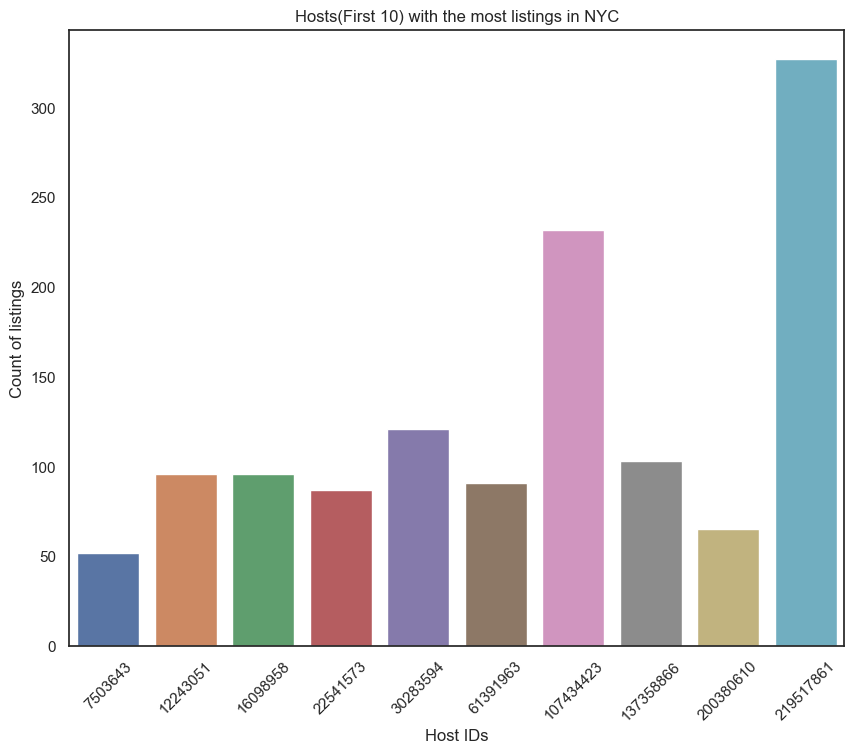

In [111]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,palette='deep')
viz_1.set_title('Hosts(First 10) with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [52]:
#eda based on NYC Borough
#subcategorising the borough

#Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]

#Manhattan
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]

#Queens
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]

#Staten Island
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]

#Bronx
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]

#putting all the prices in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5] 
print(price_list_by_n)


[       price
0        149
3         89
6         60
12        89
15       140
...      ...
48882     40
48884    190
48887    170
48890     70
48891     40

[20104 rows x 1 columns],        price
1        225
2        150
4         80
5        200
7         79
...      ...
48886    200
48888    125
48892    115
48893     55
48894     90

[21661 rows x 1 columns],        price
46       130
77        70
143      140
161       79
181      350
...      ...
48858     68
48863     93
48866     58
48878     45
48889     65

[5666 rows x 1 columns],        price
169       70
249       36
250       37
251       37
256       36
...      ...
48441     40
48446    100
48533    450
48649     54
48799    235

[373 rows x 1 columns],        price
171       40
207       45
260       90
261      105
309       90
...      ...
48783    140
48792     80
48795    125
48796     70
48805    100

[1091 rows x 1 columns]]


In [54]:
#empty list to append  with price distributions for each neighbourhood
plbn2=[]

#creating list of known values in nyc borough
borough=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    plbn2.append(i)

#changing names of the price column to the area name for easier reading of the table    
plbn2[0].rename(columns={'price':borough[0]}, inplace=True)
plbn2[1].rename(columns={'price':borough[1]}, inplace=True)
plbn2[2].rename(columns={'price':borough[2]}, inplace=True)
plbn2[3].rename(columns={'price':borough[3]}, inplace=True)
plbn2[4].rename(columns={'price':borough[4]}, inplace=True)

#dataframe for final view    
stat_df=plbn2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


C:\Users\maruv\AppData\Local\Temp\ipykernel_15732\3221747877.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price',palette='icefire' )


Text(0.5, 1.0, 'Density and distribution of prices for each Borough')

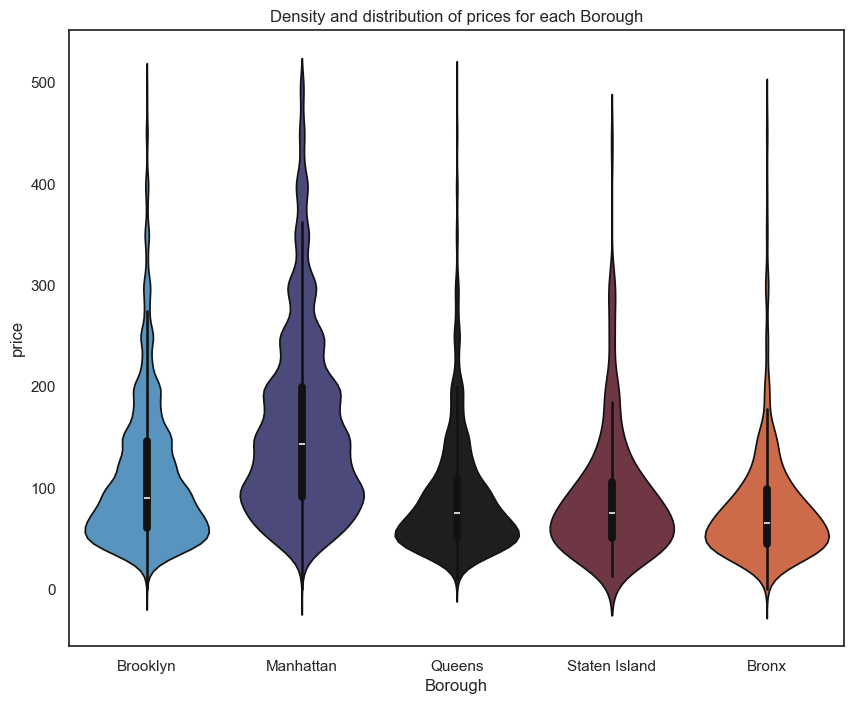

In [108]:
#removing extreme values for better visualisation

#sub-dataframe with values <500
sub_6=df[df.price < 500]

#violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price',palette='icefire' )
plt.xlabel('Borough')
viz_2.set_title('Density and distribution of prices for each Borough')

In [58]:
#EDA based on Neighbourhoods of the Borough of new york city 

#top 10 neighbourhoods
df.neighbourhood.value_counts().head(10)

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64

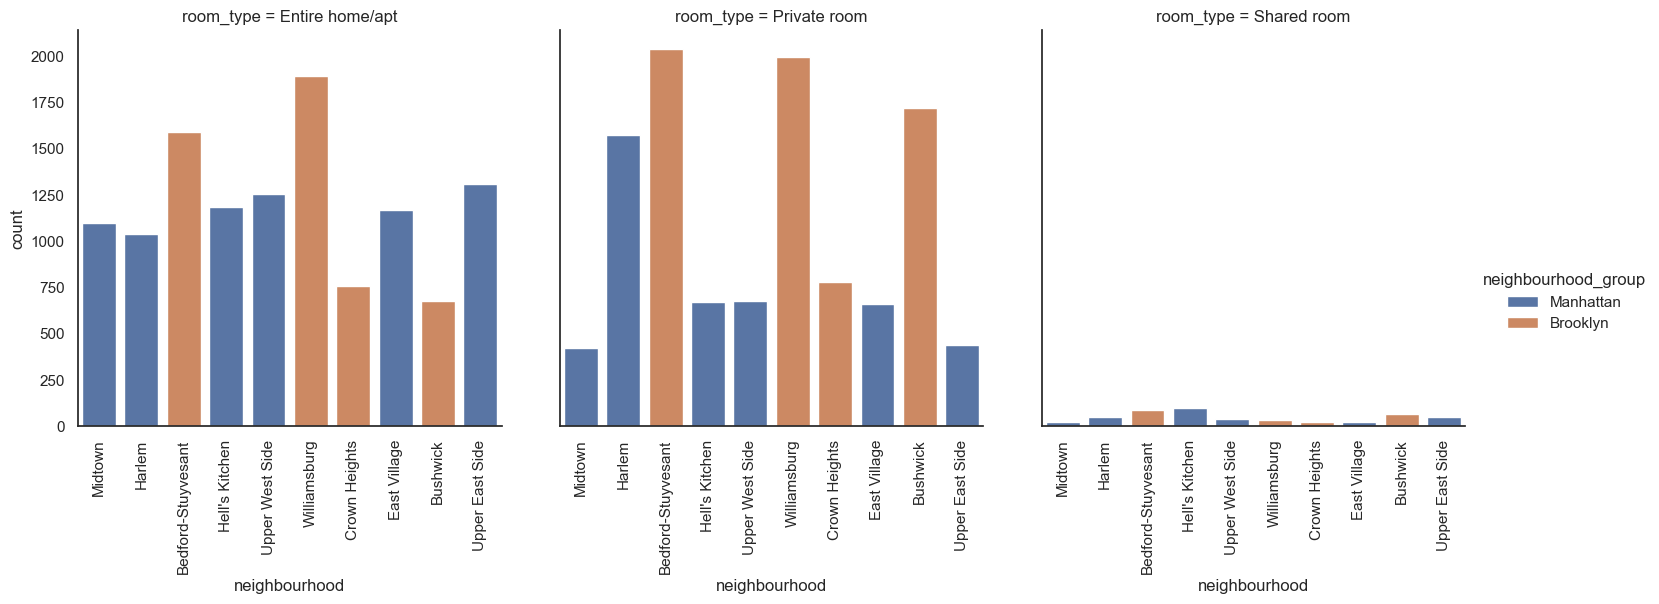

In [59]:
#combining the neigbourhoods with their borough location along with the room type 

sub_7=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

#catplot for multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

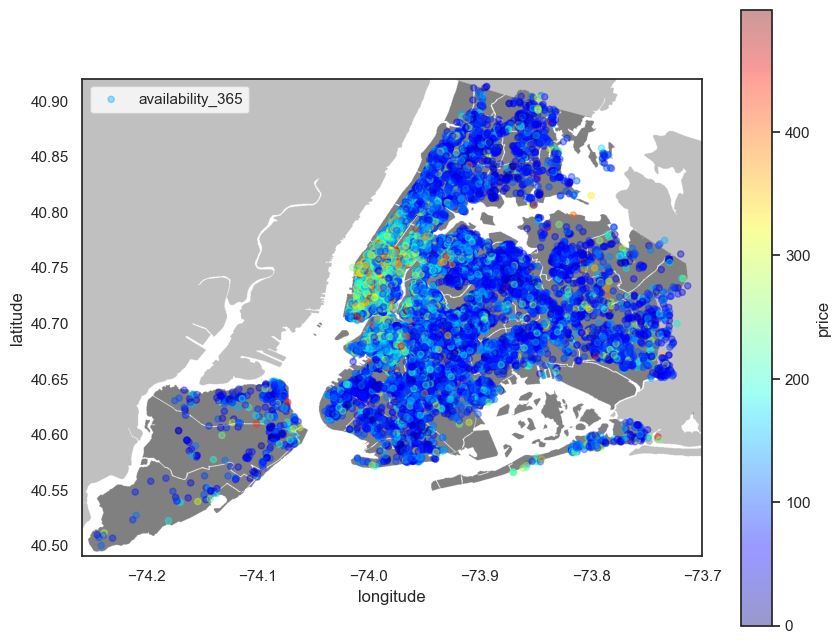

In [79]:
#scatter plot with map to see the density and price across the city 

import urllib

plt.figure(figsize=(10,8))

# Load the NYC image from the URL and save it locally
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
local_path = 'Neighbourhoods_New_York_City_Map.png'
urllib.request.urlretrieve(url, local_path)

# Read the saved image
nyc_img = plt.imread(local_path)

# Plot the image
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()

##using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

In [80]:
# EDA based on the name / words searched to find lisings 

#creating a empty list to append later
name1=[]

#getting name strings and appending it to the list
for name in df.name:
    name1.append(name)

#function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl

#empty list to count words
names_for_count=[]

#getting name string from our list and using split function, later appending to list above
for x in name1:
    for word in split_name(x):
        word=word.lower()
        names_for_count.append(word)

C:\Users\maruv\AppData\Local\Temp\ipykernel_15732\340647857.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_4=sns.barplot(x='Words', y='Count', data=sub_w,palette = 'crest')
C:\Users\maruv\AppData\Local\Temp\ipykernel_15732\340647857.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz_4.set_xticklabels(viz_4.get_xticklabels(), rotation=80)


[Text(0, 0, 'in'),
 Text(1, 0, 'room'),
 Text(2, 0, 'bedroom'),
 Text(3, 0, 'private'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'cozy'),
 Text(6, 0, 'the'),
 Text(7, 0, 'to'),
 Text(8, 0, 'studio'),
 Text(9, 0, 'brooklyn'),
 Text(10, 0, 'apt'),
 Text(11, 0, 'spacious'),
 Text(12, 0, '1'),
 Text(13, 0, 'with'),
 Text(14, 0, '2'),
 Text(15, 0, 'of'),
 Text(16, 0, 'east'),
 Text(17, 0, 'and'),
 Text(18, 0, 'manhattan'),
 Text(19, 0, '&'),
 Text(20, 0, 'park'),
 Text(21, 0, 'sunny'),
 Text(22, 0, 'beautiful'),
 Text(23, 0, 'near'),
 Text(24, 0, 'williamsburg')]

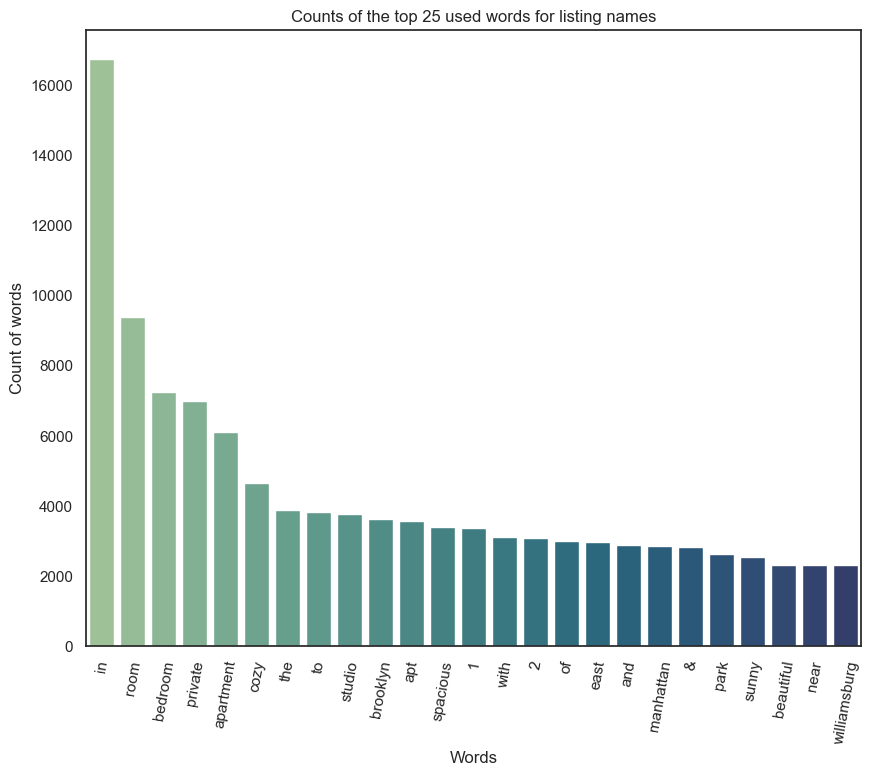

In [115]:
#using counters for hashable objects 
from collections import Counter

#top 25 used words by host to name their listing
top_25_w=Counter(names_for_count).most_common()
top_25_w=top_25_w[0:25]

#making dataframe 
sub_w=pd.DataFrame(top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

#using barplot 
viz_4=sns.barplot(x='Words', y='Count', data=sub_w,palette = 'crest')
viz_4.set_title('Counts of the top 25 used words for listing names')
viz_4.set_ylabel('Count of words')
viz_4.set_xlabel('Words')
viz_4.set_xticklabels(viz_4.get_xticklabels(), rotation=80)

In [84]:
# EDA Based on reviews 

#top 10 most reviewed listings in NYC
top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0
